In [1]:
import pandas as pd
import lstm_functions as lf
import datetime as dt
import numpy as np
from scipy.ndimage import gaussian_filter

ImportError: cannot import name 'Dense' from 'keras' (C:\Users\tamas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\__init__.py)

In [ ]:
# oil_data = yf.download('CL=F', start='2023-01-01', end='2023-12-31')
# oil_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

data = pd.read_csv('model/merged_marginal_data.csv')

data['Date'] = data.apply(
    lambda row: (
        dt.datetime(row['Year'].astype(int), row['Month'].astype(int), row['Day'].astype(int), 23, 59, 59)
        if row['Hour'].astype(int) == 24 or row['Hour'].astype(int) == 25
        else dt.datetime(row['Year'].astype(int), row['Month'].astype(int), row['Day'].astype(int), row['Hour'].astype(int))
    ), 
    axis=1
)

data.drop(['Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)
data.set_index('Date', inplace=True)
data = data['Price1']
data = data.sort_index()

In [ ]:
data_series = pd.Series(data.values, index=pd.to_datetime(data.index))

#avoid 0 values by small addition
data_series = data_series + 0.0000001

In [ ]:
data_series.max()

np.float64(220.0000001)

In [ ]:
look_back = 36
log = True
difference = True
transforms = [log, difference]

nodes = 4
epochs = 2
verbose = 0 # 0=print no output, 1=most, 2=less, 3=least
lstm_params = [nodes, epochs, verbose]

# Remove duplicate indices
data_series = data_series[~data_series.index.duplicated(keep='first')]

train_predict, y_train, test_predict, y_test = lf.lstm_model(data_series, look_back, transforms, lstm_params)

TypeError: lstm_model() missing 1 required positional argument: 'lstm_params'

                          t-0       t-1
Date                                   
2023-12-31 20:00:00  0.389226  0.397100
2023-12-31 21:00:00  0.379260  0.389226
2023-12-31 22:00:00  0.372507  0.379260
2023-12-31 23:00:00  0.371259  0.372507
2023-12-31 23:59:59  0.374032  0.371259


C:\Users\tamas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


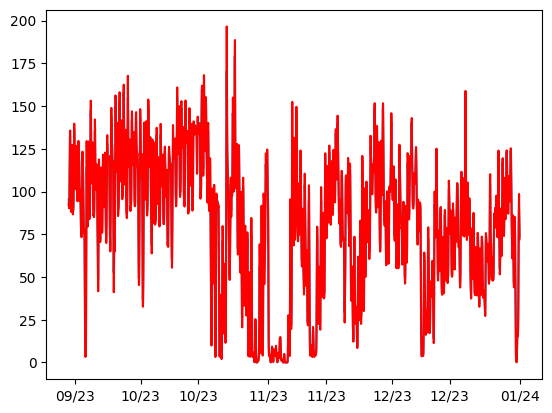

Train RMSE: 5.327
Test RMSE: 4.690


NameError: name 'df' is not defined

In [ ]:
gaussian_filtering = pd.Series(gaussian_filter(data_series, sigma=1), index=data_series.index).astype(float)
# running LSTM with Gaussian-filtered data
look_back = 36
log = True
difference = True
transforms = [log, difference]

nodes = 4
epochs = 50
verbose = 0 # 0=print no output, 1=most, 2=less, 3=least
lstm_params = [nodes, epochs, verbose]

train_predict, y_train, test_predict, y_test = lf.lstm_model(gaussian_filtering, look_back, transforms, lstm_params)

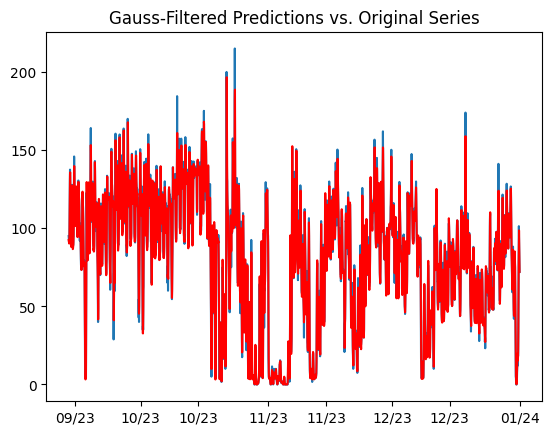

Test RMSE: 5.437


In [ ]:
# comparing gaussian model results to original data
lf.gauss_compare(data_series, test_predict, split)